# Initial Load and Data Cleaning 

In this workbook we:
1. Load the data into pandas DataFrames
2. Inspect and observe the DataFrames
3. Clean and convert the data into appropriate types


## Initial Reading of data files

In [329]:
import pandas as pd
import numpy as nm
from os import listdir
import seaborn as sns

path = 'zippedData/'

In [18]:
#helper to list all csv or type files in a dir
def find_csv_filenames( path_to_dir, suffix=".csv"):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

#creates dataframes for type specified
def create_dfs(filelist, suffix=".csv" ):
    #Read all the files and store in a dataFrame
    # the data Frames for each file will be listed in a dict 
    # where key is the name and value is the df
    dict_csv_files = {}
    path = 'zippedData/'
    for filename in csvfiles:
        filename_cleaned = filename.replace(".csv", "").replace(".","_")#cleaning
        filename_df = pd.read_csv(path + filename, index_col = 0)
        dict_csv_files[filename_cleaned] = filename_df
    return dict_csv_files    


In [19]:
#Create csvfiles, tsvfiles and call createdfs dict
csvfiles = find_csv_filenames(path)
tsvfiles = find_csv_filenames(path,'.tsv')
dict_dfs = create_dfs(csvfiles, suffix=".csv" )

In [20]:
dict_dfs.keys()

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'imdb_title_ratings', 'tmdb_movies', 'tn_movie_budgets'])

In [22]:
##Create Working DataFrames
df_bom = dict_dfs['bom_movie_gross']
df_imdb_name = dict_dfs['imdb_name_basics']       
df_imdb_akas = dict_dfs['imdb_title_akas']       
df_imdbbasics = dict_dfs['imdb_title_basics']    
df_imdb_crew = dict_dfs['imdb_title_crew']     
df_imdb_principals = dict_dfs['imdb_title_principals']     
df_imdb_ratings = dict_dfs['imdb_title_ratings']         
df_tmb = dict_dfs['tmdb_movies']                        
df_tn_movie_budget = dict_dfs['tn_movie_budgets']
#Excluding rott.tsvfiles  df_rott_info = dict_dfs(' pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
#df_rott_rev = dict_dfs(' pd.read_csv('zippedData/rt.reviews.tsv',encoding= 'unicode_escape', sep='\t')

## Inspect DataFrames
Inspecting the dfs, Noting observations about the data, describing the data types.  
We have 9 DataFrames from the 9 files:  
df_bom  
df_imdb_name   
df_imdb_akas   
df_imdbbasics   
df_imdb_crew  
df_imdb_principals      
df_imdb_ratings          
df_tmb        
df_tn_movie_budget  

### Box Office Mojo-df_bom

In [26]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [27]:
df_bom.head(3)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


#### Observation df_bom (Box office Mojo) 
It looks as if the data is for 2010 to 2018 movies 
of domestic and foreign gross in dollars.   
Foreign gross needs to be converted to int datatype.

### IMDB name basics-df_imdb_name

In [30]:
df_imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [31]:
df_imdb_name.head(3)

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


#### Observation df_imdb_name 
It looks as if the data is a name and profession
and known for these movie titles.  
The birth year and death year can be dropped as 
there is a high percentage of data missing from those columns.

### IMDB akas-df_imdb_akas

In [38]:
df_imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [58]:
df_imdb_akas.head(3)

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


#### Observation df_imdb_akas
This data looks to be aka movie names in non domestic markets.  There are lots of NaNs.  Should we just look at isoriginal title as 1?  Where does the title_id link to?  Is ok to leave NaNs alone?

### IMDBTitle basics-df_imdbbasics

In [40]:
df_imdbbasics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [41]:
df_imdbbasics.tail(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


#### Observation df_df_imdbbasics
This data has primary title and original title and year and genre of the movie.  Many missing runtime minutes can set to 90 mins?  Main point here is the genre and year and title.

### IMDB Crew-df_imfb_crew

In [35]:
df_imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [42]:
df_imdb_crew.head(3)

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585


#### Observation df_df_imdb_crew
This df matches directors and writers to tconst which is primary key in df_imdbbasics and df_imdb_principals.

### IMDB principals - df_imfb_principals

In [43]:
df_imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


In [164]:
df_imdb_principals.head(3)

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN


#### Observation df_imdb_principals
This data lists the roles of principals in movies(tconst) to categories and job and characters if they act.            
  Links to df_imdb_crew, df_imdbbasics, df_imdb_name, df_imdb_ratings.             
      nconst links to values in the df_imdb_crew and df_imdb_name listing the directors and writers.

### IMDB ratings-df_imfb_ratings

In [45]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [46]:
df_imdb_ratings.head(3)

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20


#### Observation df_imdb_ratings
Pretty straightforward rating and number of votes.  title tconst links to tconst(title) in other imdb tables.

### TMB-df_tmb



In [49]:
##The Movie DB
df_tmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [51]:
df_tmb.tail(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


#### Observation df_tmb
There are no Nans.  This looks to be good data about the movies and genres.  
Release date is an object and may be converted to a datatime if to be used.  Where to look up genre_ids?



### TN The Numbers-df_tn_movie_budget

In [52]:
##The Numbers
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [54]:
df_tn_movie_budget.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


#### Observation df_tn_movie_budget
There are no Nans.  This data is the movies, release date 
and worldwide gross with production budget.    Money data should be converted to 
int and dollas signs removed
Release date is an object and may be converted to a datatime if to be used.

<br><br><br><br><br><br>



## Data Cleaning and Typing
Removing the NanNs, dropping columns which have no importance or too many nans, converting object datatypes to be useful.

### <font color="green">Clean df_bom data</font>

In [165]:
df_bom.isna().sum()

studio             0
domestic_gross     0
foreign_gross      0
year               0
worldwide_gross    0
dtype: int64

In [166]:
df_bom.shape

(3387, 5)

In [167]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           3387 non-null   object 
 1   domestic_gross   3387 non-null   float64
 2   foreign_gross    3387 non-null   float64
 3   year             3387 non-null   int64  
 4   worldwide_gross  3387 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 318.8+ KB


In [130]:
#If NaN setting to 0..
df_bom.fillna(0, inplace=True)

In [131]:
df_bom.isna().sum()

studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [132]:
df_bom.info()
#Need to convert the foreign gross to float

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 292.3+ KB


 A Few values needed to be converted to billions

In [ ]:
# When converting to numeric foreign gross at line numbers 1872,1873,1874,2760,
#3079 were in a shorthand billions
# ie 1,131.6 for 1131600000.
# this is the quick fix
df_bom.iloc[[1872],[2]] =1131600000.0
df_bom.iloc[[1873],[2]] =1019400000.0
df_bom.iloc[[1874],[2]] =1163000000.0
df_bom.iloc[[2760],[2]] =1010000000.0
df_bom.iloc[[3079],[2]] =1369500000.0


Convert the object number of foreign gross to numeric 

In [158]:
#Convert string to numeric values...5 or so of the billions needed to be converted
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'])

In [163]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           3387 non-null   object 
 1   domestic_gross   3387 non-null   float64
 2   foreign_gross    3387 non-null   float64
 3   year             3387 non-null   int64  
 4   worldwide_gross  3387 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 318.8+ KB


In [161]:
#creating the worldwide_gross column from the dommestic and foreign gross
df_bom['worldwide_gross'] = df_bom['domestic_gross'] + df_bom['foreign_gross']

In [162]:
df_bom.head()

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


<font color='green'>Observation</font> Set Foreign gross to 0 if NaN.  If we need we can use the movie budget to look up.
Converted money columns to floats. Created worldwide_gross from domestc and foreign.



### <font color="green">Clean imdb_name data</font>

In [288]:
df_imdb_name.shape

(606648, 6)

In [185]:
df_imdb_name.isna().sum()

primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [186]:
#Can drop birth_year and death year
df_imdb_name = df_imdb_name.drop(columns=['birth_year','death_year'])

drop if both primary_profession and known_for_titles are both Nan

In [189]:
df_imdb_name.isna().sum()

primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

In [193]:
#drop if both primary_profession and known_for_titles are both Nan
col_lst = ['primary_profession', 'known_for_titles']
df_imdb_name.dropna(axis = 0, subset = col_lst, how = 'all', inplace = True)


In [194]:
df_imdb_name.isna().sum()

primary_name              0
primary_profession    41307
known_for_titles      20171
dtype: int64

<font color='green'>Observation</font> lots of NaNs but are supposed to be blank if non applicable.  put in holder value(NA, or job or characters? or 0?  Dropped 'birth_year','death_year'. If NAN for known_for can drop?  Final decision to fill na with 'unknown'

In [196]:
df_imdb_name[df_imdb_name['known_for_titles'].isna()].head()

,primary_name,primary_profession,known_for_titles
nconst,,,
nm10108345,Jiaxi Li,actor,NaN
nm10113099,Greg Quibell,actor,NaN
nm10114259,Vera Prifatamasari,actress,NaN
nm10115487,Laurette De Haan,"director,writer,cinematographer",NaN
nm10115788,Sustraida's Band,composer,NaN


In [201]:
#if there is a Nan in remaining data fill in with unknown
df_imdb_name['known_for_titles'].fillna(value='unknown', inplace=True)
df_imdb_name['primary_profession'].fillna(value='unknown', inplace=True)

In [202]:
df_imdb_name.isna().sum()

primary_name          0
primary_profession    0
known_for_titles      0
dtype: int64

In [203]:
df_imdb_name.shape

(596615, 3)

### <font color="green">Clean imdb_akas data</font>

In [293]:
df_imdb_akas.shape

(331703, 8)

In [206]:
df_imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             331703 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [343]:
#Unsure if this data is useful
#df_imdb_akas = df_imdb_akas[df_imdb_akas['is_original_title'] == 1.0]

In [205]:
df_imdb_akas.isna().sum()

ordering                  0
title                     0
region                    0
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [168]:
df_imdb_akas.head(3)

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


In [210]:
set(df_imdb_akas['types'])

{'alternative',
 'dvd',
 'dvd\x02imdbDisplay',
 'festival',
 'festival\x02working',
 'imdbDisplay',
 'original',
 'tv',
 'unknown',
 'video',
 'working'}

In [213]:
#for NaNs in these columns set to unknown
col_list = ['region','language','types','attributes']
for col in col_list:
    
    df_imdb_akas[col].fillna(value='unknown', inplace=True)
 

In [220]:
df_imdb_akas.isna().sum()

ordering             0
title                0
region               0
language             0
types                0
attributes           0
is_original_title    0
dtype: int64

In [218]:
df_imdb_akas = df_imdb_akas[df_imdb_akas['is_original_title'].notna()]

In [219]:
df_imdb_akas.shape

(331678, 7)

<font color='green'>Actions</font> In columns 'region','language','types','attributes'set Nan to 'unknown 
<br>removed is_original title id Nan

### <font color="green">Clean imdb_basics data</font>

In [221]:
df_imdbbasics.shape

(146144, 5)

In [222]:
df_imdbbasics.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [169]:
df_imdbbasics.head(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [223]:
df_imdbbasics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [226]:
#for NaNs in these columns set to unknown
col_list = ['genres','original_title']
for col in col_list:
    
    df_imdbbasics[col].fillna(value='unknown', inplace=True)

In [224]:
#If runtime minutes missing set to 89.5 minutes
df_imdbbasics['runtime_minutes'].fillna(89.5,inplace=True)


In [227]:
df_imdbbasics.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

<font color='green'>Actions</font> In columns 'genres','original_title' set Nan to 'unknown 
<br>if runtime minutes set to 89.5 if Nan

### <font color="green">Clean imdb_crew data</font>

In [309]:
df_imdb_crew.shape

(146144, 3)

In [247]:
df_imdb_crew.isna().sum()

directors    0
writers      0
dtype: int64

In [310]:
df_imdb_crew.head(5)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [258]:
df_imdb_crew.shape

(141670, 2)

In [244]:
df_imdb_crew = df_imdb_crew[df_imdb_crew['directors'].notna() 
                            | df_imdb_crew['writers'].notna()]

In [256]:
#for NaNs in these columns set to unknown
col_list = ['directors','writers']
for col in col_list:
    df_imdb_crew[col].fillna(value='unknown', inplace=True)

C:\Users\dsmith\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [257]:
df_imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141670 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  141670 non-null  object
 1   writers    141670 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


<font color='green'>Actions</font> If directors and writers are NaN drop row(4474 rows).  If then if directors is Nan replace with holder 'unknown'.  If writers is Nan replace with unknown.

### <font color="green">Clean imdb_principals data</font>

In [108]:
df_imdb_principals.shape

(1028186, 5)

In [109]:
df_imdb_principals.tail()

,ordering,nconst,category,job,characters
tconst,,,,,
tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
tt9692684,3,nm10441594,director,NaN,NaN
tt9692684,4,nm6009913,writer,writer,NaN
tt9692684,5,nm10441595,producer,producer,NaN


In [253]:
df_imdb_principals.isna().sum()

ordering      0
nconst        0
category      0
job           0
characters    0
dtype: int64

In [252]:
#for NaNs in these columns set to unknown
col_list = ['job','characters']
for col in col_list:
    df_imdb_principals[col].fillna(value='unknown', inplace=True)

In [254]:
df_imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         1028186 non-null  object
 4   characters  1028186 non-null  object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


<font color='green'>Actions</font> replaced columns job and characters if Nan to 'unknown'

### <font color="green">Clean imdb_ratings data</font>

In [ ]:
df_imdb_ratings.shape

In [284]:
df_imdb_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [324]:
df_imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [104]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


<font color=green>Actions</font> All Clean.  No missing data in this lookup table

### <font color="green">Clean df_tmb data</font>

In [325]:
df_tmb.shape

(26517, 10)

In [285]:
df_tmb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [103]:
df_tmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [102]:
df_tmb.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


<font color=green>Actions:</font> Clean Data Note: Convert release date to datetime when using

### <font color="green">Clean df_tn_movie_budget data</font>

In [326]:
df_tn_movie_budget.shape

(5782, 6)

In [286]:
df_tn_movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [63]:
df_tn_movie_budget.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [62]:
for col in df_tn_movie_budget:
    print(col)
    print(df_tn_movie_budget[col].value_counts(normalize = True)[:5])
    print("===================================")

release_date
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
movie
Home         0.000519
King Kong    0.000519
Halloween    0.000519
Life         0.000346
Serenity     0.000346
Name: movie, dtype: float64
production_budget
$20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64
domestic_gross
$0             0.094777
$8,000,000     0.001557
$7,000,000     0.001211
$2,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64
worldwide_gross
$0            0.063473
$8,000,000    0.001557
$7,000,000    0.001038
$2,000,000    0.001038
$9,000,000    0.000692
Name: worldwide_gross, dtype: float64


Domectic gross has 9.4 % of zero values.  Similiar to worldwide gross.  

Will need to address.

look at budget data in bom, rott, tn
df_tn_movie_budget[df_tn_movie_budget['domestic_gross'] > 500000000.0]

In [98]:
#Convert the object columns to ints where we can manipulate mathematically
#money string to ints
def money_to_float(df,col):
    df[col] = df[col].astype(str).str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [99]:
money_cols = ['production_budget','domestic_gross', 'worldwide_gross']

for col in money_cols:
    df_tn_movie_budget = money_to_float(df_tn_movie_budget,col)

In [171]:
df_tn_movie_budget.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


In [101]:
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


<font color=green>Actions</font> Converted string currrency to float values. Convert release date to datetime when using

## Data Exploration

### Best Return on Investment of Medium budget movies
In industry terms there are four types of production level movies.
1. High Budget: Production budget(PB) is greater than $80 Million
2. Medium Budget: PB is between $2 Million to $80 Million
3. Low Bugdet: PB is between $10K and $2 Million  
4. Micro Budget: PB is under 10K  
Microscoft would not want to take a chance on high budget so we will look at returns on movies below $65 Million(average)

Lets look at the df_tn_movie_budget data

In [259]:
df_tn_movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Lets create difference between worldwide gross and prod budget 
profit = returned - investment 
profit_over_pb = worldwide_gross - production_budget

and also percent returned for movies with budgets below $65Mill
 ROI = Net Profit / Cost of the investment * 100
 roi= profit_over_pb / production_budget *100

In [262]:
df_tn_movie_budget['profit_over_pb'] = df_tn_movie_budget['worldwide_gross'] - \
df_tn_movie_budget['production_budget']

In [280]:
df_tn_movie_budget['roi'] = round((df_tn_movie_budget['profit_over_pb'] / \
df_tn_movie_budget['production_budget'])*100,1)

In [284]:
df_tn_movie_budget.sort_values(by='roi',ascending = False).head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi
id,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,44975000.0,179900.0
14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,99550000.0,49775.0
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,43051.8
80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,41556474.0,41556.5
7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,247700000.0,41283.3
10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,22168808.0,34105.9
47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,267142000.0,31135.4
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,2034928.0,29070.4
77,"Oct 1, 1968",Night of the Living Dead,114000.0,12087064.0,30087064.0,29973064.0,26292.2


In [276]:
Lets filter to look at movies where budget is less than=$65 mill

1799.0

In [290]:
df_budget_bl65m = df_tn_movie_budget[df_tn_movie_budget['production_budget'] \
                   <= 65000000.0].sort_values(by='roi', ascending = False)

In [293]:
df_budget_bl65m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5012 entries, 46 to 63
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5012 non-null   object 
 1   movie              5012 non-null   object 
 2   production_budget  5012 non-null   float64
 3   domestic_gross     5012 non-null   float64
 4   worldwide_gross    5012 non-null   float64
 5   profit_over_pb     5012 non-null   float64
 6   roi                5012 non-null   float64
dtypes: float64(5), object(2)
memory usage: 313.2+ KB


In [294]:
df_budget_bl65m.reset_index(inplace =True) 

In [298]:
df_budget_2to65mil = df_budget_bl65m[df_budget_bl65m['production_budget'] \
                   >= 200000.0].sort_values(by='roi', ascending = False)

In [300]:
df_budget_2to65mil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 1 to 5011
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4872 non-null   int64  
 1   release_date       4872 non-null   object 
 2   movie              4872 non-null   object 
 3   production_budget  4872 non-null   float64
 4   domestic_gross     4872 non-null   float64
 5   worldwide_gross    4872 non-null   float64
 6   profit_over_pb     4872 non-null   float64
 7   roi                4872 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 342.6+ KB


In [301]:
df_budget_2to65mil.reset_index(inplace =True) 

In [304]:
df_budget_2to65mil.head(10)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi
0,1,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,99550000.0,49775.0
1,2,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,43051.8
2,4,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,247700000.0,41283.3
3,6,47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,267142000.0,31135.4
4,9,11,"Nov 21, 1976",Rocky,1000000.0,117235147.0,225000000.0,224000000.0,22400.0
5,10,37,"Oct 17, 1978",Halloween,325000.0,47000000.0,70000000.0,69675000.0,21438.5
6,13,73,"Aug 11, 1973",American Graffiti,777000.0,115000000.0,140000000.0,139223000.0,17918.0
7,17,13,"Jul 25, 1969",The Stewardesses,200000.0,13500000.0,25000000.0,24800000.0,12400.0
8,18,18,"Dec 21, 1937",Snow White and the Seven Dwarfs,1488000.0,184925486.0,184925486.0,183437486.0,12327.8
9,19,58,"Jan 1, 1971",Billy Jack,800000.0,98000000.0,98000000.0,97200000.0,12150.0


In [310]:
df_budget_2to65mil_21yr = df_budget_2to65mil[pd.to_datetime(df_budget_2to65mil['release_date']).dt.year >= 2000]

In [311]:
df_budget_2to65mil_11yrs = df_budget_2to65mil[pd.to_datetime(df_budget_2to65mil['release_date']).dt.year >= 2010]

In [313]:
df_budget_2to65mil_21yr.reset_index(inplace =True) 

In [314]:
df_budget_2to65mil_21yr.head()

,level_0,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi
0,1,2,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,43051.8
1,10,22,8,"Jun 11, 2004",Napoleon Dynamite,400000.0,44540956.0,46122713.0,45722713.0,11430.7
2,11,23,31,"Aug 6, 2004",Open Water,500000.0,30500882.0,55518641.0,55018641.0,11003.7
3,13,26,12,"Jan 6, 2012",The Devil Inside,1000000.0,53262945.0,101759490.0,100759490.0,10075.9
4,18,33,60,"Apr 23, 2009",Home,500000.0,15433.0,44793168.0,44293168.0,8858.6


In [315]:
df_budget_2to65mil_11yrs.reset_index(inplace =True) 

In [351]:
df_budget_2to65mil_11yrs[900:955]

,level_0,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi
900,2673,2728,57,"Oct 3, 2014",Left Behind,16000000.0,14019924.0,20769209.0,4769209.0,29.8
901,2674,2729,33,"Feb 26, 2016",Triple 9,20000000.0,12639297.0,25943792.0,5943792.0,29.7
902,2677,2732,48,"Jul 10, 2015",Self/Less,26000000.0,12279691.0,33667319.0,7667319.0,29.5
903,2678,2733,49,"Jun 13, 2018",Superfly,16000000.0,20537137.0,20723581.0,4723581.0,29.5
904,2683,2738,68,"Mar 29, 2013",The Host,50000000.0,26623701.0,64477051.0,14477051.0,29.0
905,2699,2752,78,"Sep 7, 2012",The Cold Light of Day,20000000.0,3763583.0,25361206.0,5361206.0,26.8
906,2701,2756,26,"Aug 21, 2013",The Mortal Instruments: City of Bones,60000000.0,31165421.0,75965567.0,15965567.0,26.6
907,2707,2762,78,"Apr 27, 2012",Safe,33000000.0,17142080.0,41495213.0,8495213.0,25.7
908,2720,2775,52,"Dec 17, 2010",Rabbit Hole,5000000.0,2229058.0,6205034.0,1205034.0,24.1
909,2721,2776,62,"Jul 29, 2011",The Future,1000000.0,568662.0,1239174.0,239174.0,23.9


In [320]:
df_budget_2to65mil_11yrs.describe()

,level_0,index,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi
count,1759.000000,1759.000000,1759.000000,1.759000e+03,1.759000e+03,1.759000e+03,1.759000e+03,1759.000000
mean,2643.361001,2711.770893,51.013644,1.772029e+07,2.325029e+07,4.922397e+07,3.150368e+07,203.662877
std,1485.856667,1510.669840,28.585358,1.683269e+07,3.708323e+07,8.133133e+07,7.361289e+07,618.994073
min,13.000000,26.000000,1.000000,2.000000e+05,0.000000e+00,0.000000e+00,-6.448372e+07,-100.000000
25%,1386.500000,1437.500000,27.000000,4.000000e+06,3.413100e+04,5.944755e+05,-3.010736e+06,-88.350000
50%,2607.000000,2662.000000,51.000000,1.200000e+07,6.069605e+06,1.672747e+07,3.414530e+06,37.400000
75%,4084.000000,4161.500000,76.000000,2.800000e+07,3.420873e+07,6.516481e+07,4.039450e+07,230.600000
max,4871.000000,5011.000000,100.000000,6.500000e+07,3.630707e+08,8.949853e+08,8.399853e+08,10075.900000


In [322]:
df_budget_2to65mil_21yr.describe()

,level_0,index,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi
count,3599.000000,3599.000000,3599.000000,3.599000e+03,3.599000e+03,3.599000e+03,3.599000e+03,3599.000000
mean,2573.098639,2636.199222,50.221173,1.909694e+07,2.450792e+07,4.824937e+07,2.915244e+07,208.390997
std,1391.960173,1410.164929,28.716203,1.716282e+07,3.667838e+07,7.502115e+07,6.772022e+07,956.443459
min,1.000000,2.000000,1.000000,2.000000e+05,0.000000e+00,0.000000e+00,-6.448372e+07,-100.000000
25%,1397.500000,1448.500000,25.000000,4.900000e+06,3.237005e+05,1.694063e+06,-3.305302e+06,-71.100000
50%,2596.000000,2651.000000,50.000000,1.500000e+07,9.737892e+06,1.934462e+07,3.873142e+06,38.200000
75%,3804.500000,3870.500000,75.000000,3.000000e+07,3.508412e+07,6.426185e+07,3.739481e+07,228.400000
max,4871.000000,5011.000000,100.000000,6.500000e+07,3.707829e+08,8.949853e+08,8.399853e+08,43051.800000


<AxesSubplot:xlabel='production_budget', ylabel='roi'>

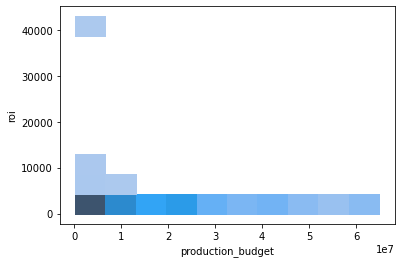

In [338]:
#df_budget_2to65mil_21yr['roi'].hist(bins=11, by='production_budget')
sns.histplot(y=df_budget_2to65mil_21yr['roi'], x=df_budget_2to65mil_21yr['production_budget'],stat="count",bins=10
            )

<AxesSubplot:ylabel='roi'>

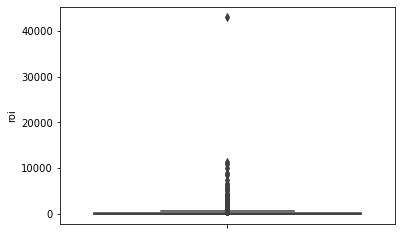

In [340]:
sns.boxplot(y=df_budget_2to65mil_21yr['roi'])

Setting expectations on the ROI The Median RoI for movies in the medium budget range to 2mil to 65 mill is med 38% on return. Take in additional rule of thumb on marketing which is separate of the PB. the last 11 years is 37% I would say anything over this Roi would be a success as a first time movie maker. 50% roi to make everyone happy...  Then show histogram of group level of PB and Rois could do box plots of the same groups maybe..10 mil steps 2-15 15-25 25-35 35-45 45-55 55-65

### Most popular genres
best return on avg by genre
or which genres make most money on avg % of budget




df_imdbbasics basics had the genre info with movie

In [172]:
df_imdbbasics.head(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [173]:
df_budget_genres = pd.merge(df_tn_movie_budget, df_imdbbasics, 
                            left_on=  ['movie'],
                            right_on= ['primary_title'], 
                            how = 'left')

In [174]:
df_budget_genres.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"


In [ ]:
#df_budget_genres.to_csv()

In [178]:
df_budget_genres.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       7221 non-null   object 
 1   movie              7221 non-null   object 
 2   production_budget  7221 non-null   float64
 3   domestic_gross     7221 non-null   float64
 4   worldwide_gross    7221 non-null   float64
 5   primary_title      3815 non-null   object 
 6   original_title     3814 non-null   object 
 7   start_year         3815 non-null   float64
 8   runtime_minutes    3328 non-null   float64
 9   genres             3743 non-null   object 
dtypes: float64(5), object(5)
memory usage: 620.6+ KB


In [179]:
#genres is a list of upto 3 genres, splitting it to get the individual genres
df_budget_genres['genres'] = df_budget_genres['genres'].astype(str).apply(lambda x: x.split(",") if x else x)
df_budget_genres.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Avatar,Abatâ,2011.0,93.0,[Horror]
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Dark Phoenix,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN,[nan]


In [180]:
#a set of distinct genres in the df
all_genres = set()
for genres in df_budget_genres['genres']:
    if genres:
        all_genres.update(genres)

In [181]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western',
 'nan'}